# Autoencoder

[Labeled Faces in the Wild Dataset](http://vis-www.cs.umass.edu/lfw/)

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

### Data Collection and preprocessing
For training we'll be using deep-funnelled images instead of raw images.

In [2]:
#Download the dataset
from wget import download as wget
lfw_attributes = wget("http://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt")
print(lfw_attributes,"downloaded")
#images
lfw_deepfunneled = wget("http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz")
print(lfw_deepfunneled,"downloaded")
#raw images
lfw = wget("http://vis-www.cs.umass.edu/lfw/lfw.tgz")
print(lfw,"downloaded")

100% [........................................................................] 14879205 / 14879205lfw_attributes.txt downloaded
100% [......................................................................] 108761145 / 108761145lfw-deepfunneled.tgz downloaded
100% [......................................................................] 180566744 / 180566744lfw.tgz downloaded


In [3]:
import shutil
shutil.unpack_archive(lfw_deepfunneled)
shutil.unpack_archive(lfw)

(250, 250, 3)
(90, 90, 3)


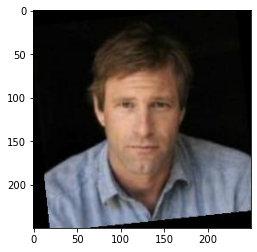

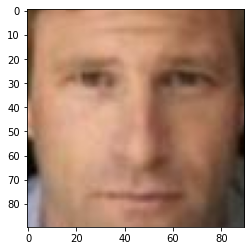

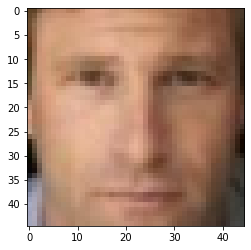

In [4]:
#images are tilted to keep the faces straight in deep funnelled images
deepfunneled = "lfw-deepfunneled"
img=cv.imread("lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)
plt.figure()
plt.imshow(img)
dy=dx=80 # extract faces which are centres in the middle in deepfunneled
img = img[dy:-dy, dx:-dx]
print(img.shape)
plt.figure()
plt.imshow(img)
dimx= dimy=45
img = cv.resize(img, (dimx, dimy)) #converting to 45x45
plt.figure()
plt.imshow(img)

(250, 250, 3)
(90, 90, 3)


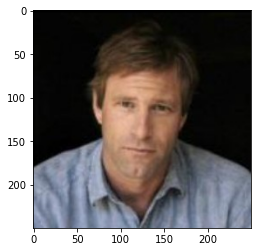

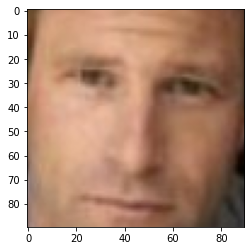

In [5]:
img=cv.imread("lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)
plt.figure()
plt.imshow(img)
dy=dx=80
img = img[dy:-dy, dx:-dx]
print(img.shape)
plt.figure()
plt.imshow(img)

In [6]:
attributes = pd.read_csv(lfw_attributes, sep='\t', skiprows=1)
attributes.columns = list(attributes.columns)[1:] + ["Remove_Last"]
attributes = attributes.drop("Remove_Last", axis=1)
attributes

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,Aaron Eckhart,1,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.195580,-0.835609,-0.351468,...,0.361738,1.166118,-1.164916,-1.139990,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
1,Aaron Guiel,1,0.169851,-0.982408,0.422709,-1.282184,-1.360060,-0.867002,-0.452293,-0.197521,...,-0.832036,-0.397680,0.874160,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.666760,-0.496559
2,Aaron Patterson,1,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,...,1.549743,1.884745,-0.999765,-1.359858,-1.912108,-1.095634,0.915126,-0.572332,0.144262,-0.841231
3,Aaron Peirsol,1,1.122719,-1.997799,1.916144,-2.514214,-2.580071,-1.404239,0.057551,0.000196,...,0.567822,-0.176089,1.108125,-1.600944,-3.264613,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,Aaron Peirsol,2,1.078214,-2.008098,1.676211,-2.278056,-2.651845,-1.348408,0.649089,0.017656,...,-1.461474,-0.955283,0.119113,-1.128176,-3.161048,0.082680,-0.439614,-0.359859,-0.760774,-0.410152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,Zorica Radovic,1,-0.205363,-0.202842,-1.232735,-1.409125,-1.804858,0.287268,-0.521815,-0.789165,...,-0.867156,-0.879554,-0.179497,0.323676,-2.188852,-1.169369,0.924397,-0.217415,-0.414024,-0.495178
13139,Zulfiqar Ahmed,1,1.957472,-2.472470,-1.307994,-0.671636,-1.960125,-0.838803,-1.365955,0.510448,...,-2.487289,2.608861,-0.954190,-1.599463,-1.238220,-1.187034,1.874130,-0.832614,0.152785,-0.554331
13140,Zumrati Juma,1,-0.037001,-1.164150,0.228494,0.187503,-1.836475,-0.958412,-0.669697,-0.480330,...,-1.938639,-0.491080,0.495067,-0.524767,-1.073731,0.111010,0.976262,-0.453027,-0.399981,-1.078655
13141,Zurab Tsereteli,1,0.282219,-0.396198,1.270470,-1.981209,-1.702940,-1.507203,-2.330721,-0.295928,...,-0.662101,-1.692131,1.284772,-0.808180,-0.710051,0.694621,0.936065,-0.767500,1.146930,-0.260940


In [7]:
import os
dy=dx=80
dimx= dimy=45
faces = []
for path in attributes[["person", "imagenum"]].values:
    person = path[0].replace(' ','_')
    imagenum = str(path[1]).zfill(4)
    path = deepfunneled+'/'+person+'/'+person+'_'+imagenum+'.jpg'
    img=cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = img[dy:-dy, dx:-dx]
    img = cv.resize(img, (dimx, dimy))
    faces.append(img)
print(len(faces))


13143


In [8]:
faces = np.stack(faces).astype('uint8')
faces

array([[[[ 93,  67,  38],
         [ 96,  67,  39],
         [131,  95,  67],
         ...,
         [ 88,  57,  39],
         [ 79,  58,  42],
         [ 75,  59,  45]],

        [[100,  72,  44],
         [116,  84,  55],
         [161, 123,  95],
         ...,
         [ 90,  59,  40],
         [ 80,  59,  41],
         [ 73,  58,  43]],

        [[107,  77,  47],
         [133,  99,  70],
         [175, 135, 106],
         ...,
         [ 90,  59,  41],
         [ 78,  57,  39],
         [ 67,  52,  37]],

        ...,

        [[161, 163, 188],
         [176, 171, 188],
         [151, 135, 142],
         ...,
         [ 64,  62,  55],
         [ 62,  62,  57],
         [ 63,  65,  61]],

        [[164, 167, 188],
         [174, 169, 186],
         [143, 127, 136],
         ...,
         [ 65,  62,  57],
         [ 66,  66,  61],
         [ 63,  65,  62]],

        [[163, 166, 188],
         [170, 167, 183],
         [140, 129, 139],
         ...,
         [ 69,  66,  62],
        

### Autoencoder

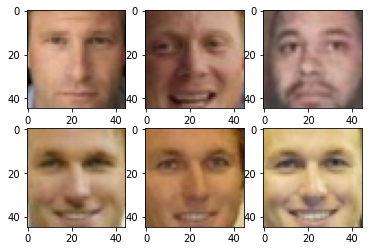

In [9]:
img_shape = faces.shape[1:]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(faces[i])

In [10]:
#Normalize images
x = faces.astype('float32') / 255.0 - 0.5
# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(np.clip(x[i] + 0.5, 0, 1))
print(x.shape)
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size=0.1, random_state=42)

(13143, 45, 45, 3)


### Principal Component Analysis (PCA) Autoencoder

In [12]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, InputLayer, Flatten, Dense, Reshape
from tensorflow.keras.backend import clear_session

clear_session()
def sequential_autoencoder(img_shape, code_size):
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(200))
    encoder.add(Dense(code_size))
    
    decoder = Sequential()
    decoder.add(InputLayer(code_size))
    decoder.add(Dense(200))
    decoder.add(Dense(np.prod(img_shape)))#multiply the dimensions to get totla dimensions
    decoder.add(Reshape(img_shape))
    
    return encoder,decoder

encoder, decoder = sequential_autoencoder(img_shape, code_size=64)

inp = Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)
autoencoder = Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')
encoder.summary()
decoder.summary()
autoencoder.summary()


autoencoder.fit(x=x_train, y=x_train, epochs=100,
                validation_data=[x_test, x_test],
                verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6075)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               1215200   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
Total params: 1,228,064
Trainable params: 1,228,064
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               13000     
_________________________________________________________________
dense_3 (Dense)              (None, 6075)              1221075   
________________________

42/42 [==============================] - 0s 2ms/step - loss: 0.0035
PCA Autoencoder MSE: 0.003463225206360221


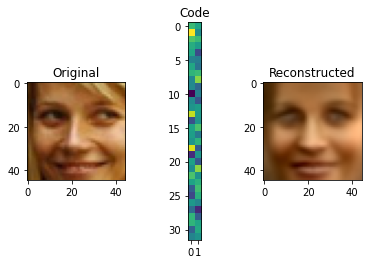

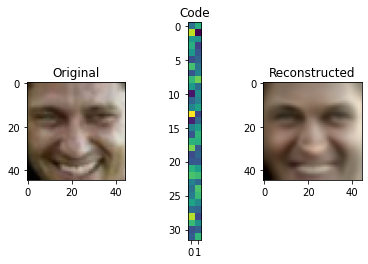

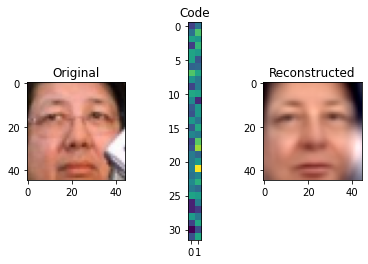

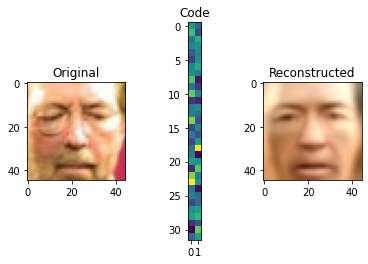

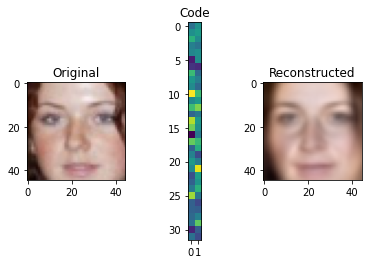

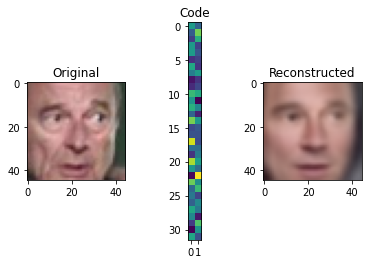

In [13]:
def visualize(img,encoder,decoder):
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(np.clip(img + 0.5, 0, 1))

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(np.clip(reco + 0.5, 0, 1))
    plt.show()



score = autoencoder.evaluate(x_test,x_test,verbose=1)
print("PCA Autoencoder MSE:", score)

for i in range(5,11):
    img = x_test[i]
    visualize(img,encoder,decoder)

## Convolutional Neural Network Autoencoder
For calculation of outputsize for Con2dTranspose check [this StackExchange Question](https://datascience.stackexchange.com/q/26451/40034)

In [14]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, InputLayer, Flatten, Dense, Reshape
from tensorflow.keras.backend import clear_session

clear_session()
def convolutional_autoencoder(img_shape, code_size):

    height, width, channels = img_shape
    
    # encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(MaxPooling2D(pool_size=(2, 2)))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(1*1*256))
    decoder.add(Reshape((1, 1, 256)))
    decoder.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=3, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=3, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=5, activation='elu', padding='same'))
    decoder.add(Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=1, activation=None, padding='same'))
    return encoder, decoder

encoder, decoder = convolutional_autoencoder(img_shape, code_size=64)
encoder.summary()
decoder.summary()

inp = Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')
autoencoder.summary()
autoencoder.fit(x=x_train, y=x_train, epochs=50,
                validation_data=[x_test, x_test],
                verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 45, 45, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 256)         2

370/370 [==============================] - 2s 6ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 46/50
370/370 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 47/50
370/370 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 48/50
370/370 [==============================] - 5s 13ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 49/50
370/370 [==============================] - 2s 6ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 50/50
370/370 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0000e+00


Convolutional Autoencoder MSE: 0.004711771383881569


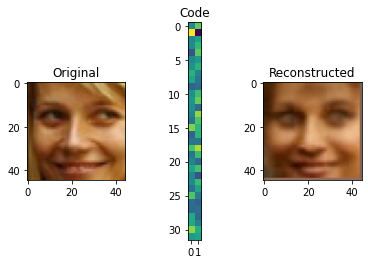

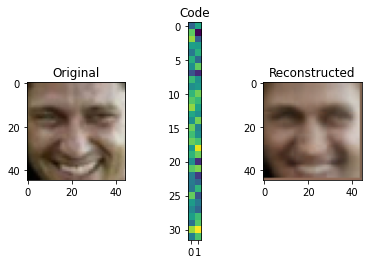

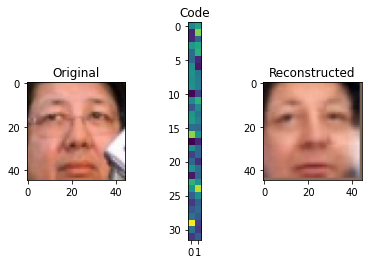

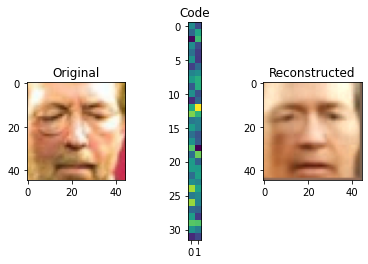

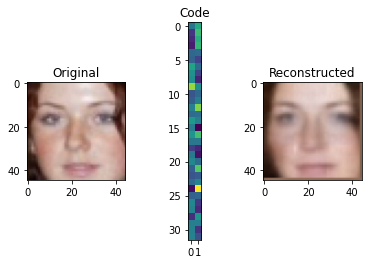

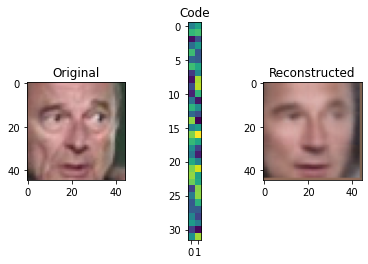

In [16]:
reconstruction_mse = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Convolutional Autoencoder MSE:", reconstruction_mse)
for i in range(5,11):
    img = x_test[i]
    visualize(img,encoder,decoder)

## Some Applications of Autoencoder
### Denoising

In [17]:
#add noise to the images
def add_gaussian_noise(X,sigma):
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape)### YOUR CODE HERE ###
    return X + noise

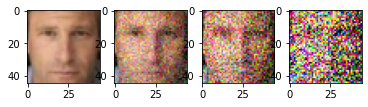

In [18]:
plt.subplot(1,4,1)
plt.imshow(np.clip(x[0] + 0.5, 0, 1))
plt.subplot(1,4,2)
plt.imshow(np.clip((add_gaussian_noise(x[:1],sigma=0.1)[0]) + 0.5, 0, 1))
plt.subplot(1,4,3)
plt.imshow(np.clip((add_gaussian_noise(x[:1],sigma=0.2)[0]) + 0.5, 0, 1))
plt.subplot(1,4,4)
plt.imshow(np.clip((add_gaussian_noise(x[:1],sigma=0.5)[0]) + 0.5, 0, 1))

In [19]:
x_train_noise = add_gaussian_noise(x_train, 0.1)
x_test_noise = add_gaussian_noise(x_test,0.1)
clear_session()
denoising_encoder, denoising_decoder = convolutional_autoencoder(img_shape, code_size=512)
inp = Input(img_shape)
code = denoising_encoder(inp)
reconstruction = denoising_decoder(code)
autoencoder = Model(inp, reconstruction)
autoencoder.compile('adamax', 'mse')
autoencoder.fit(x=x_train_noise, y=x_train, epochs=25,
                    validation_data=[x_test_noise, x_test],
                    verbose=1)

Epoch 1/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0117 - val_loss: 0.0000e+00
Epoch 2/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0072 - val_loss: 0.0000e+00
Epoch 3/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0000e+00
Epoch 4/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0056 - val_loss: 0.0000e+00
Epoch 5/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0052 - val_loss: 0.0000e+00
Epoch 6/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0000e+00
Epoch 7/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0047 - val_loss: 0.0000e+00
Epoch 8/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0046 - val_loss: 0.0000e+00
Epoch 9/25
370/370 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0000e+00
Epoch 10/25
370/370 [==============================] - 2s 5ms/st

Denoising Autoencoder MSE: 0.0037941797636449337


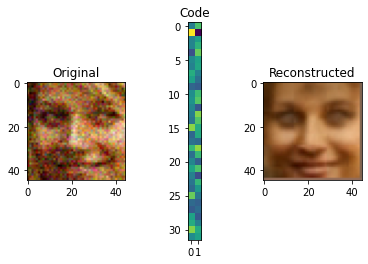

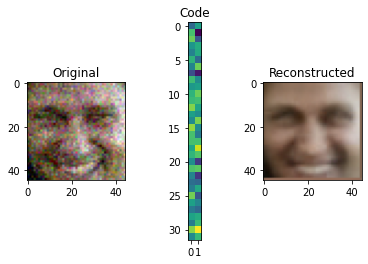

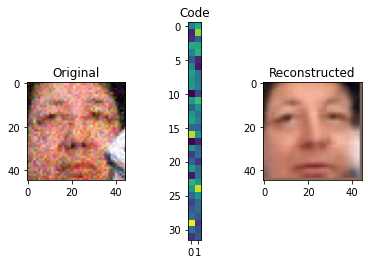

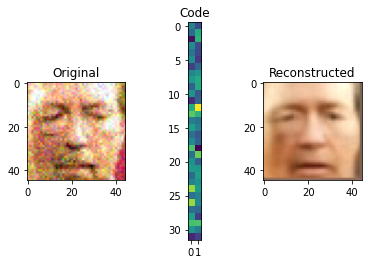

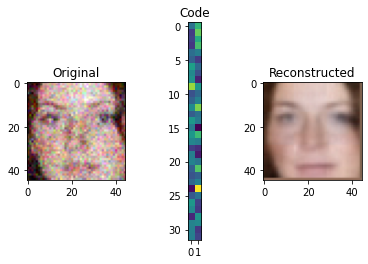

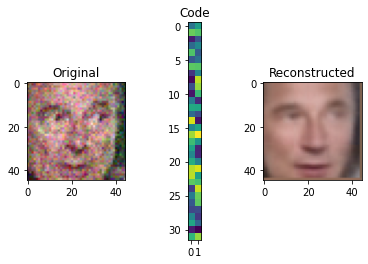

In [20]:
denoising_autoencoder_mse = autoencoder.evaluate(x_test_noise, x_test, verbose=0)
print("Denoising Autoencoder MSE:", denoising_autoencoder_mse)
for i in range(5,11):
    img = x_test_noise[i]
    visualize(img,encoder,decoder)

### Searching for similar images
Using our previously trained convolutional encoder

In [21]:
from sklearn.neighbors.unsupervised import NearestNeighbors

#encoding all images
x_codes = encoder.predict(x)
nn = NearestNeighbors(metric="euclidean")
nn.fit(x_codes)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [22]:
def find_similar_images(image, n_neighbors):
    code = encoder.predict(image[None])
    (distances,),(idx,) = nn.kneighbors(code,n_neighbors=n_neighbors)
    return distances,x[idx],idx

def show_similar_images(image):
    n_neighbors=5
    distances,neighbors,idx = find_similar_images(image,n_neighbors=5)
    print(idx)
    plt.figure(figsize=[9,7])
    plt.subplot(1,n_neighbors,1)
    plt.imshow(np.clip(image + 0.5, 0, 1))
    plt.title("Input")
    for i in range(n_neighbors-1):
        plt.subplot(1,n_neighbors,i+2)
        plt.imshow(np.clip(neighbors[i] + 0.5, 0, 1))
        plt.title("dist=%.3f"%distances[i])
    plt.show()

[   68 11084 10260  5814  7253]


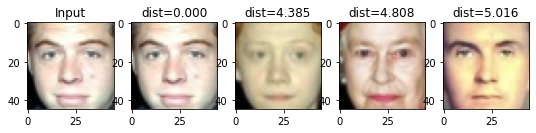

In [23]:
show_similar_images(x_test[1300])

### Adding subtracting images to create new images
Using previously trained encoder and decoder

This might not always generate sensible images.

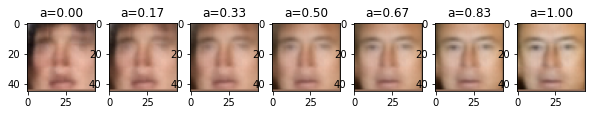

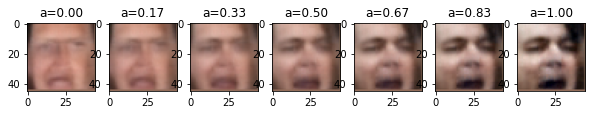

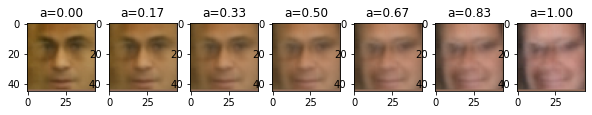

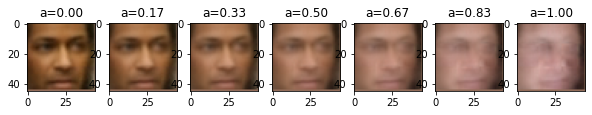

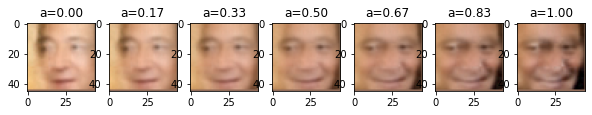

In [24]:
for _ in range(5):
    image1,image2 = x_test[np.random.randint(0,len(x_test),size=2)]
    code1, code2 = encoder.predict(np.stack([image1, image2]))
    plt.figure(figsize=[10,4])
    for i,a in enumerate(np.linspace(0,1,num=7)):

        output_code = code1*(1-a) + code2*(a)
        output_image = decoder.predict(output_code[None])[0]

        plt.subplot(1,7,i+1)
        plt.imshow(np.clip(output_image + 0.5, 0, 1))
        plt.title("a=%.2f"%a)
        
    plt.show()